<a href="https://colab.research.google.com/github/hgstyler/ML_tutorial/blob/main/tf008_XOR_Neural_Network_09202022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**XOR case: Role of Neural Network(NN)**

#### Case 0: Module, Dataset ####

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility
tf.compat.v1.disable_eager_execution() # tf.compat.v1 methods, which is not compatible with eager execution

In [ ]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.compat.v1.placeholder(tf.float32)
Y = tf.compat.v1.placeholder(tf.float32)

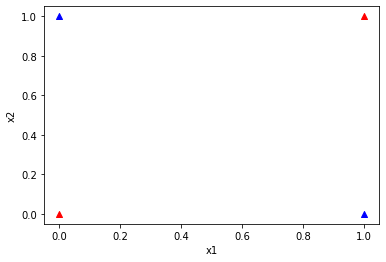

In [ ]:
plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')  # False
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')  # False
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^') # True
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^') # True

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

#### Case 1: without NN ####

In [ ]:
W = tf.Variable(tf.random.normal([2, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [ ]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run(W)}')
    
    print('\n\n------------ Model Evaluation ------------')
    h_case1, c_case1, a_case1 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h_case1}\n\nCorrect:\n{c_case1}\nAccuracy: {a_case1}')

------------ Training Log ------------
Step: 0, 0.7117927670478821 [[-0.535027  ]
 [-0.10763884]]
Step: 1000, 0.6931482553482056 [[-0.00442437]
 [-0.00361264]]
Step: 2000, 0.6931471824645996 [[-7.963403e-05]
 [-7.809328e-05]]
Step: 3000, 0.6931471824645996 [[-1.5385630e-06]
 [-1.5385864e-06]]
Step: 4000, 0.6931471824645996 [[-8.8677027e-08]
 [-8.8700446e-08]]
Step: 5000, 0.6931471824645996 [[-8.8677027e-08]
 [-8.8700446e-08]]
Step: 6000, 0.6931471824645996 [[-8.8677027e-08]
 [-8.8700446e-08]]
Step: 7000, 0.6931471824645996 [[-8.8677027e-08]
 [-8.8700446e-08]]
Step: 8000, 0.6931471824645996 [[-8.8677027e-08]
 [-8.8700446e-08]]
Step: 9000, 0.6931471824645996 [[-8.8677027e-08]
 [-8.8700446e-08]]
Step: 10000, 0.6931471824645996 [[-8.8677027e-08]
 [-8.8700446e-08]]


------------ Model Evaluation ------------
Hypothesis:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]

Correct:
[[0.]
 [0.]
 [0.]
 [0.]]
Accuracy: 0.5


#### Case 2: with NN ####

In [ ]:
W1 = tf.Variable(tf.random.normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random.normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [ ]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [ ]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h_case2, c_case2, a_case2 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h_case2}\n\nCorrect:\n{c_case2}\nAccuracy: {a_case2}')

------------ Training Log ------------
Step: 0, 0.6760706901550293 [array([[-0.9116113 ,  2.1872685 ],
       [ 0.17145656,  1.2250288 ]], dtype=float32), array([[-0.75747806],
       [ 1.0715176 ]], dtype=float32)]
Step: 1000, 0.5847054123878479 [array([[-0.24956575,  3.0743742 ],
       [ 0.7535305 ,  2.9015243 ]], dtype=float32), array([[-1.0059866],
       [ 2.6035469]], dtype=float32)]
Step: 2000, 0.4784656763076782 [array([[-0.03971131,  4.2783737 ],
       [ 1.8405988 ,  4.4802094 ]], dtype=float32), array([[-2.2993648],
       [ 4.2714763]], dtype=float32)]
Step: 3000, 0.32961326837539673 [array([[1.1946568, 5.023514 ],
       [1.9232824, 5.565961 ]], dtype=float32), array([[-4.0901713],
       [ 5.497391 ]], dtype=float32)]
Step: 4000, 0.10907191038131714 [array([[2.885736 , 5.6821737],
       [2.9218416, 6.034389 ]], dtype=float32), array([[-6.796079 ],
       [ 6.7808633]], dtype=float32)]
Step: 5000, 0.05577512085437775 [array([[3.5348408, 6.030708 ],
       [3.5642655, 6.2

####Case 3: Wide NN####

In [ ]:
W1 = tf.Variable(tf.random.normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random.normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random.normal([10, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [ ]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [ ]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h_case3, c_case3, a_case3 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h_case3}\n\nCorrect:\n{c_case3}\nAccuracy: {a_case3}')

------------ Training Log ------------
Step: 0, 0.7093961834907532 [array([[ 0.5839096 ,  0.9133602 , -0.24468046,  1.6707006 ,  1.8484185 ,
         0.11666252, -0.07476136,  0.6058053 ,  0.3192901 ,  0.78577894],
       [ 1.0705717 ,  1.3650125 ,  0.29175583,  1.9927607 ,  0.20615327,
        -0.66254467,  0.26526603,  0.3544406 , -0.3330507 ,  0.06424826]],
      dtype=float32), array([[-0.19814111],
       [-0.44078925],
       [ 0.6734015 ],
       [-0.31981176],
       [ 1.1795123 ],
       [ 1.4421306 ],
       [-0.23079716],
       [-0.439797  ],
       [-1.075608  ],
       [ 0.9401596 ]], dtype=float32)]
Step: 1000, 0.48968857526779175 [array([[ 0.5480758 ,  1.5943148 , -0.28889206,  2.6060264 ,  1.6390214 ,
         0.42829475, -0.01456905,  0.56614274,  1.6211168 ,  0.5855328 ],
       [ 1.0232693 ,  1.7002802 ,  0.14154133,  2.7512903 , -0.6363282 ,
        -0.9033494 ,  0.2661097 ,  0.10545462, -1.1850104 ,  0.03677252]],
      dtype=float32), array([[-7.6367585e-05],
   

####Case 4: Deep NN####

In [ ]:
W1 = tf.Variable(tf.random.normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random.normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random.normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random.normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random.normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random.normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random.normal([10, 1]), name='weight4')
b4= tf.Variable(tf.random.normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

In [ ]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [ ]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h_case4, c_case4, a_case4 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h_case4}\n\nCorrect:\n{c_case4}\nAccuracy: {a_case4}')

------------ Training Log ------------
Step: 0, 0.7953001856803894 [array([[-0.48692465, -0.6780247 , -0.00437055, -1.6681812 , -0.71828413,
         1.4190301 ,  1.3310592 ,  0.09131467, -0.57739043, -0.39863792],
       [-0.80176353,  0.7908471 ,  1.255227  ,  0.59551686, -0.20150854,
         0.11920063,  1.4938242 ,  0.45654634, -2.0173042 ,  2.2931116 ]],
      dtype=float32), array([[ 1.3966155 ,  2.6744778 ,  0.51517135,  0.2745188 ,  0.7633295 ,
         0.13285   , -0.6421318 ,  0.12809855,  0.5421663 ,  0.4040392 ],
       [-1.9004437 ,  1.3083416 ,  1.9962864 ,  0.0338665 , -0.01751705,
        -0.52075034, -2.016085  ,  0.83175635,  0.18016972,  0.73956645],
       [ 0.98231405,  0.3509483 , -0.88955224,  0.10703155,  0.32212844,
         0.67042047, -0.8460181 ,  0.37957984, -0.44095755, -0.87168443],
       [-1.2721437 ,  0.34453636,  0.10760846, -0.6416082 , -1.5941797 ,
         1.6513381 , -0.16740154,  1.791491  , -0.6148747 , -0.46599847],
       [-0.13981673, -1.415

####Conclusion####

In [ ]:
print('--------------- Case 1: No NN   ---------------')
print(f'Hypothesis:\n{h_case1}\n\nCorrect:\n{c_case1}\nAccuracy: {a_case1}\n')

print('--------------- Case 2: use NN  ---------------')
print(f'Hypothesis:\n{h_case2}\n\nCorrect:\n{c_case2}\nAccuracy: {a_case2}\n')

print('--------------- Case 3: Wide NN ---------------')
print(f'Hypothesis:\n{h_case3}\n\nCorrect:\n{c_case3}\nAccuracy: {a_case3}\n')

print('--------------- Case 4: Deep NN ---------------')
print(f'Hypothesis:\n{h_case4}\n\nCorrect:\n{c_case4}\nAccuracy: {a_case4}')

--------------- Case 1: No NN   ---------------
Hypothesis:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]

Correct:
[[0.]
 [0.]
 [0.]
 [0.]]
Accuracy: 0.5

--------------- Case 2: use NN  ---------------
Hypothesis:
[[0.01715893]
 [0.9866419 ]
 [0.98646915]
 [0.01494458]]

Correct:
[[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0

--------------- Case 3: Wide NN ---------------
Hypothesis:
[[0.00595665]
 [0.9931518 ]
 [0.9937117 ]
 [0.00721565]]

Correct:
[[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0

--------------- Case 4: Deep NN ---------------
Hypothesis:
[[0.0025667 ]
 [0.99787736]
 [0.99666315]
 [0.00330186]]

Correct:
[[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0
